TypeError: FileMovieWriter.setup() got an unexpected keyword argument 'clear_temp'

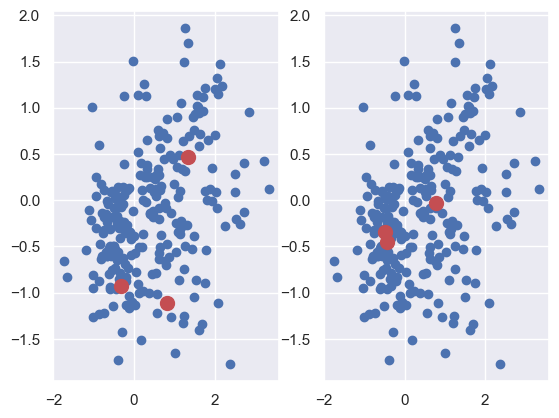

In [5]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

point = np.vstack(((np.random.randn(150,2)*0.75 + np.array([1,0])),
                   (np.random.randn(50,2) * 0.25 +np.array([-0.5,-0.5])),
                   (np.random.randn(50,2) * 0.5 + np.array([-0.5,-0.5]))))

plt.scatter(point[:,0], point[:,1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1,0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5,-0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5,-0.5]), 0.5/2, fill=False, lw=3))

def initialize_centroids(point,k):
    """Returns k centroids from the initial points"""
    centroids = point.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(point,centroids):
    """returns array containing the index of the closest centroid for each point"""
    distances = np.sort(((point - centroids[:,np.newaxis])**2).sum(axis=2))
    return np.argmin(distances,axis=0)

c = initialize_centroids(point, 3)
closest_centroid(point, c)

c_extended = c[:, np.newaxis,:]
c_extended

c_extended.shape

p = point[0]
p

c_extended - p

(c_extended - p).shape

point[:4] - c_extended

np.sqrt(((point[:4] - c_extended)**2).sum(axis=2))

np.argmin(np.sqrt(((point[:4] - c_extended)**2).sum(axis=2)),axis=0)

def move_centroids(point, closest, centroids):
    """returns the new centroids that is made from the point closest to them"""
    return np.array([point[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

plt.subplot(121)
plt.scatter(point[:,0],point[:,1])
centroids = initialize_centroids(point, 3)
plt.scatter(centroids[:,0],centroids[:,1],c="r",s=100)

plt.subplot(122)
plt.scatter(point[:,0],point[:,1])
closest = closest_centroid(point, centroids)
centroids = move_centroids(point, closest, centroids)
plt.scatter(centroids[:,0],centroids[:,1],c="r",s=100)

from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(point, 3)

def init():
    return

def animate(i):
    global centroids
    closest = closest_centroid(point, centroids)
    centroids = move_centroids(point, closest, centroids)
    ax.cla()
    ax.scatter(point[:, 0], point[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    return 

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=10, interval=200, blit=False)


In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import random
import time 

# Size of dataset to be generated. The final size is 4 * data_size
data_size = 1000
num_iters = 50
num_clusters = 4


# sample from Gaussians 
data1 = np.random.normal((5,5,5), (4, 4, 4), (data_size,3))
data2 = np.random.normal((4,20,20), (3,3,3), (data_size, 3))
data3 = np.random.normal((25, 20, 5), (5, 5, 5), (data_size,3))
data4 = np.random.normal((30, 30, 30), (5, 5, 5), (data_size,3))

# Combine the data to create the final dataset
data = np.concatenate((data1,data2, data3, data4), axis = 0)

# Shuffle the data
np.random.shuffle(data)

# Set random seed for reproducibility 
random.seed(0)

# Initialise centroids
centroids = data[random.sample(range(data.shape[0]), 4)]

# Create a list to store which centroid is assigned to each dataset
assigned_centroids = np.zeros(len(data), dtype = np.int32)

def compute_l2_distance(x, centroid):
    # Compute the difference, following by raising to power 2 and summing
    dist = ((x - centroid) ** 2).sum(axis = x.ndim - 1)
    
    return dist

def get_closest_centroid(x, centroids):
    
    # Loop over each centroid and compute the distance from data point.
    dist = compute_l2_distance(x, centroids)

    # Get the index of the centroid with the smallest distance to the data point 
    closest_centroid_index =  np.argmin(dist, axis = 1)
    
    return closest_centroid_index

def compute_sse(data, centroids, assigned_centroids):
    # Initialise SSE 
    sse = 0

    # Compute SSE
    sse = compute_l2_distance(data, centroids[assigned_centroids]).sum() / len(data)
    
    return sse

# Number of dimensions in centroid
num_centroid_dims = data.shape[1]

# List to store SSE for each iteration 
sse_list = []

# Start time
tic = time.time()

# Main Loop
for n in range(50):
    # Get closest centroids to each data point
    assigned_centroids = get_closest_centroid(data[:, None, :], centroids[None,:, :])    
    
    # Compute new centroids
    for c in range(centroids.shape[1]):
        # Get data points belonging to each cluster 
        cluster_members = data[assigned_centroids == c]
        
        # Compute the mean of the clusters
        cluster_members = cluster_members.mean(axis = 0)
        
        # Update the centroids
        centroids[c] = cluster_members
    
    # Compute SSE
    sse = compute_sse(data.squeeze(), centroids.squeeze(), assigned_centroids)
    sse_list.append(sse)

# End time
toc = time.time()

print(round(toc - tic, 4)/50)

0.0014199999999999998


In [9]:
import numpy as np

def assignPointsToCentroids(centroids, points):
    '''Determine the centroid to which each point is nearest, and
        store this as an int from 0 to K-1 in classifications.
    '''
    M = points.shape[0]
    K = centroids.shape[0]
    classifications = np.zeros((M,), dtype=np.int)

    for i in range(M):
        smallestDistance = 0
        for k in range(K):
            distance = np.linalg.norm(points[i,:] - centroids[k,:])
            if k == 0:
                smallestDistance = distance
                classifications[i] = k
            elif distance < smallestDistance:
                smallestDistance = distance
                classifications[i] = k
    return classifications

def recalcCentroids(centroids, points, classifications):
    '''Recalculate centroid locations for each cluster.'''
    K = centroids.shape[0]
    N = points.shape[1]
    M = points.shape[0]

    newCentroids = np.zeros((K, N))
    for k in range(K):
        if sum(classifications == k) > 0:
            newCentroids[k,:] = (
                np.sum(points[classifications == k,:], axis=0)
                / sum(classifications == k))
        else:
            newCentroids[k,:] = centroids[k,:]
    return newCentroids

class KMeansND:
    '''KMeansND(initialCentroids, points)

    PARAMETERS:

    initialCentroids: K x N array of K initial centroids with N
        features/coordinates.

    points: M x N array of M points with N features/coordinates.

    METHODS:

    (centroids, classifications, iterations) = getCentroids()
        Perform K-means clustering. Return a tuple containing the
        array of centroid coordinates, an M x 1 array of point
        classifications, and number of iterations required.

    getGenerator()
        Return a generator function to step through K-means iterations.
        Each call of the generator returns the current centroids,
        classifications, and iteration, beginning with the initial
        centroids and classifications.
    '''
    def __init__(self, initialCentroids, points):
        if initialCentroids.shape[1] != points.shape[1]:
            raise RuntimeError('Dimension mismatch. Centroids and data points'
                + ' must be described by the same number of features.')
        else:
            self.initialCentroids = initialCentroids
            self.points = points

def getCentroids(self):
    centroids = np.copy(self.initialCentroids)
    # Initialize lastCentroids to arbitrary value different from centroids
    # to ensure loop executes at least once.
    lastCentroids = centroids + 1
    iteration = 0
    while not np.array_equal(centroids, lastCentroids):
        lastCentroids = np.copy(centroids)
        classifications = assignPointsToCentroids(centroids, self.points)
        centroids = recalcCentroids(centroids, self.points, classifications)
        iteration += 1
    return (centroids, classifications, iteration)

def _generatorFunc(self):
    centroids = np.copy(self.initialCentroids)
    lastCentroids = centroids + 1
    iteration = 0
    initialIteration = True
    while not np.array_equal(centroids, lastCentroids):
        if initialIteration:
            classifications = assignPointsToCentroids(centroids, self.points)
            initialIteration = False
        else:
            lastCentroids = np.copy(centroids)
            classifications = assignPointsToCentroids(centroids, self.points)
            centroids = recalcCentroids(centroids, self.points, classifications)
            iteration += 1
        yield (centroids, classifications, iteration)

def getGeneratorFunc(self):
    return self._generatorFunc

